## Nama : Alif Adwitiya Pratama

# Predictive Analysis - Diabetes Risk Prediction

### 1. Persiapan

#### 1.1 Masukkan Library

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV


#remove warning
import warnings
warnings.filterwarnings('ignore')

#### 1.2 Masukkan Data

In [24]:
df=pd.read_csv('./data/diabetes.csv')

### 2. Data Understanding

dataset yang digunakan dapat diakses [disini](https://www.kaggle.com/datasets/jillanisofttech/diabetes-disease-updated-dataset)

#### 2.1 Tentang Dataset

**Deskripsi**<br>
Dataset ini berasal dari National Institute of Diabetes and Digestive and Kidney Diseases. Tujuannya adalah untuk memprediksi berdasarkan pengukuran diagnostik apakah seorang pasien menderita diabetes. Batasan dataset ini adalah bahwa semua pasien adalah wanita berusia 21 tahun atau lebih dengan keturunan Pima Indian.
diambil dari [sini](https://www.kaggle.com/datasets/jillanisofttech/diabetes-disease-updated-dataset)

**Tentang Fitur** <br>
terdapat 8 fitur yang digunakan untuk memprediksi apakah seseorang menderita diabetes atau tidak. Fitur-fitur tersebut adalah:
- Pregnancies: Jumlah kehamilan
- Glucose: Konsentrasi glukosa plasma 2 jam dalam tes toleransi glukosa oral
- BloodPressure: Tekanan darah diastolik (mm Hg)
- SkinThickness: Ketebalan lipatan kulit trisep (mm)
- Insulin: Insulin serum 2 jam (mu U / ml)
- BMI: Indeks massa tubuh (berat dalam kg / (tinggi dalam m) ^ 2)
- DiabetesPedigreeFunction: Fungsi silsilah diabetes
- Age: Usia (tahun)

**Tentang Target**<br>
Target yang digunakan adalah Outcome, dimana 0 berarti tidak diabetes dan 1 berarti menderita diabetes.




#### 2.2 Deskripsi Data


In [25]:
#sample data
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [26]:
#shape data
print(df.shape)

(768, 9)


In [27]:
# data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [28]:
# check null
display(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [29]:
# check duplicate
print('jumlah data duplikat : ',df.duplicated().sum())

jumlah data duplikat :  0


In [30]:
# check deskripsi statistik
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Tabel di atas menunjukkan hasil statistik dari data pasien pada 768 pasien wanita yang telah dites untuk diabetes. Beberapa hal menarik yang dapat dilihat dari hasil statistik tersebut antara lain:

- **Usia:** Rata-rata usia pasien adalah 33 tahun, dengan rentang usia antara 21-81 tahun. Usia merupakan faktor risiko penting pada diabetes, di mana semakin tua usia seseorang, semakin besar kemungkinan untuk terkena diabetes.
- **Kehamilan:** Rata-rata jumlah kehamilan pada pasien adalah 4 kali (dibulatkan). Kehamilan yang berulang-ulang dapat meningkatkan risiko diabetes gestasional, yaitu diabetes yang terjadi selama kehamilan.
- **Glukosa darah:** Rata-rata kadar glukosa dalam darah pasien adalah 120,8 mg/dL. Glukosa darah yang tinggi dapat menunjukkan adanya diabetes atau kondisi yang disebut prediabetes, di mana kadar glukosa darah lebih tinggi dari normal namun belum cukup tinggi untuk dianggap sebagai diabetes.
- **Tekanan darah sistolik:** Rata-rata tekanan darah sistolik pada pasien adalah 69 mmHg. Tekanan darah yang tinggi dapat merusak pembuluh darah dan organ tubuh lainnya, dan dapat meningkatkan risiko diabetes.
- **Ketebalan kulit:** Rata-rata ketebalan kulit pada pasien adalah 20,5 mm. Ketebalan kulit yang rendah dapat menjadi faktor risiko diabetes tipe 2, di mana tubuh tidak dapat menggunakan insulin dengan efektif.
- **Insulin:** Rata-rata tingkat insulin pada pasien adalah 79,8 mu/L. Insulin yang tinggi dapat menunjukkan adanya resistensi insulin atau diabetes tipe 2.
- **Indeks massa tubuh (BMI):** Rata-rata indeks massa tubuh (BMI) pada pasien adalah 31,9 kg/m2. BMI yang tinggi dapat menjadi faktor risiko diabetes tipe 2.
- **DiabetesPedigreeFunction:** Rata-rata nilai fungsi DiabetesPedigreeFunction pada pasien adalah 0,47. Fungsi DiabetesPedigreeFunction menghitung risiko genetik seseorang terhadap diabetes tipe 2 berdasarkan riwayat keluarga.
- **Outcome:** Sekitar 34,8% dari pasien terdiagnosis mengidap diabetes. Hal ini menunjukkan bahwa kebanyakan pasien pada dataset ini tidak menderita diabetes.

#### 2.3 Visualisasi Data

##### 2.3.1 Presentasi Pasien Diabetes

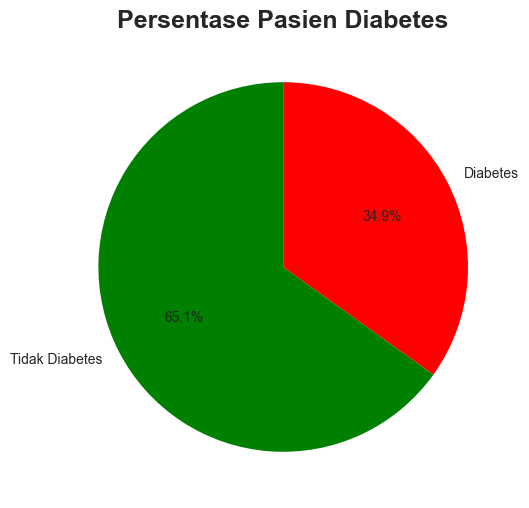

In [31]:
plt.figure(figsize = (10,6))
colors = ['green', 'red']
labels = ['Tidak Diabetes', 'Diabetes']
plt.pie(df.Outcome.value_counts(), colors = colors, labels = labels, autopct = '%.1f%%', startangle = 90)
plt.title('Persentase Pasien Diabetes', fontweight = 'bold', fontsize = 18)
plt.ylabel('')
plt.style.use('seaborn-dark')
plt.show()



terdapat 65.1% pasien yang tidak menderita diabetes dan 34.9% pasien yang menderita diabetes.

##### 2.3.2 Korelasi Fitur

<Axes: >

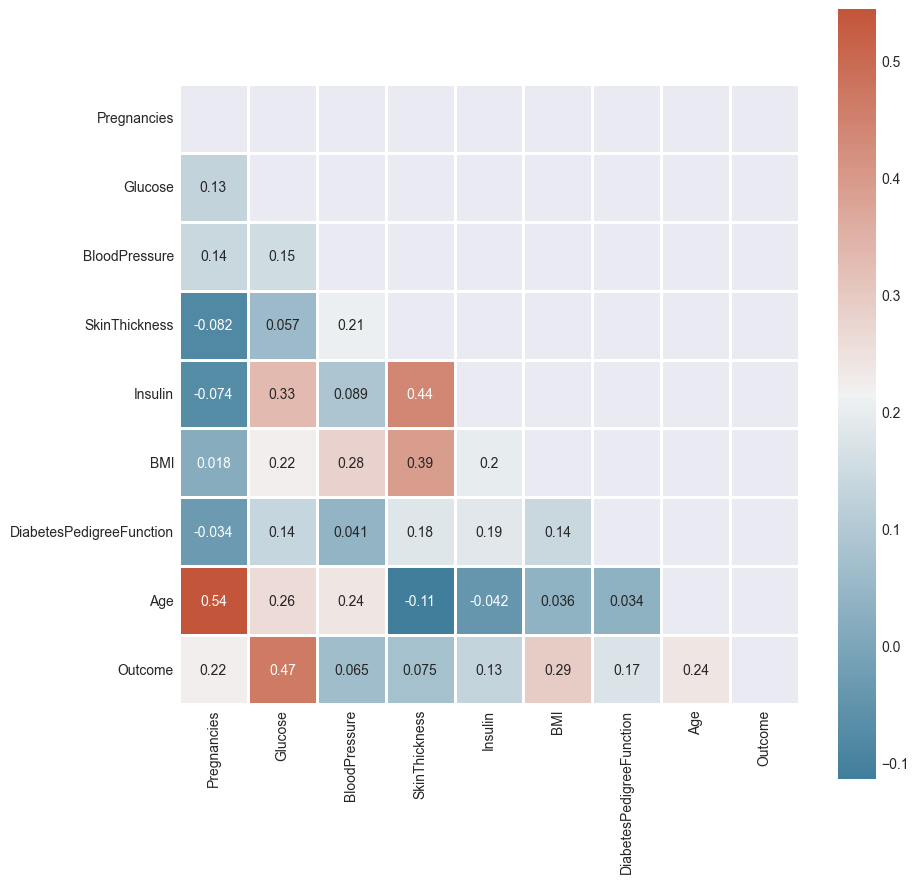

In [32]:
corr = df.corr()
fig, ax = plt.subplots(figsize = (10,10))
cmap = sns.diverging_palette(230, 20, as_cmap = True)
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, square = True, annot = True, linewidths = 1, cmap = cmap, mask = mask)

Tabel korelasi berikut menunjukkan korelasi antara beberapa variabel yang terdapat dalam dataset diabetes. Setiap sel pada tabel menunjukkan korelasi antara dua variabel. Nilai korelasi berkisar antara -1 hingga 1, dimana nilai -1 menunjukkan korelasi negatif sempurna, nilai 0 menunjukkan tidak adanya korelasi, dan nilai 1 menunjukkan korelasi positif sempurna.

Dari tabel ini didapatkan informasi bahwa tekanan darah dan ketebalan kulit tidak memiliki hubungan signifikan dengan diabetes sehingga dapat didrop dari dataset

##### 2.3.3 Outier Detection

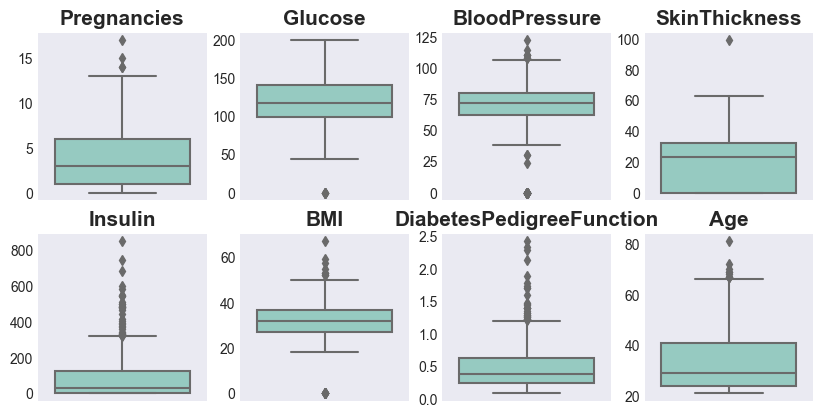

In [33]:
plt.figure(figsize = (10,10))
for i in range(0, len(df.columns)-1):
	plt.subplot(4,4,i+1)
	sns.boxplot(df.iloc[:,i])
	plt.title(df.columns[i], fontweight = 'bold', fontsize = 15)
	plt.xticks([])

hampir pada semua fitur memiliki outlier yang perlu dihapuskan

### 3. Preprocessing Data

#### 3.1 Membuang kolom yang tidak diperlukan

In [34]:
drop_col = ['SkinThickness','BloodPressure']
df.drop(drop_col, axis = 1, inplace = True)
df.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,0,33.6,0.627,50,1
1,1,85,0,26.6,0.351,31,0
2,8,183,0,23.3,0.672,32,1
3,1,89,94,28.1,0.167,21,0
4,0,137,168,43.1,2.288,33,1


#### 3.2 Menghapus Outlier

In [35]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(random_state = 0, contamination = 0.05)
clf.fit(df)
pred = clf.predict(df)
pred = pd.DataFrame(pred, columns = ['not_outlier'])
df=df.iloc[pred[pred['not_outlier'] == 1].index.values].reset_index(drop = True)
df

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,0,33.6,0.627,50,1
1,1,85,0,26.6,0.351,31,0
2,8,183,0,23.3,0.672,32,1
3,1,89,94,28.1,0.167,21,0
4,5,116,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...
724,10,101,180,32.9,0.171,63,0
725,2,122,0,36.8,0.340,27,0
726,5,121,112,26.2,0.245,30,0
727,1,126,0,30.1,0.349,47,1


#### 3.3 data splitting

In [36]:
from sklearn.model_selection import train_test_split
X = df.drop('Outcome', axis = 1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101, stratify = y)
print('Jumlah baris dan kolom dari x_train adalah :', X_train.shape,', sedangkan Jumlah baris dan kolom dari y_train adalah :', y_train.shape)
print('Prosentase diabetes di y_train adalah :')
print(y_train.value_counts(normalize = True))
print('')
print('Jumlah baris dan kolom dari x_test adalah :', X_test.shape,', sedangkan Jumlah baris dan kolom dari y_test adalah :', y_test.shape)
print('Prosentase diabetes di y_test adalah :')
print(y_test.value_counts(normalize = True))




Jumlah baris dan kolom dari x_train adalah : (656, 6) , sedangkan Jumlah baris dan kolom dari y_train adalah : (656,)
Prosentase diabetes di y_train adalah :
Outcome
0    0.661585
1    0.338415
Name: proportion, dtype: float64

Jumlah baris dan kolom dari x_test adalah : (73, 6) , sedangkan Jumlah baris dan kolom dari y_test adalah : (73,)
Prosentase diabetes di y_test adalah :
Outcome
0    0.657534
1    0.342466
Name: proportion, dtype: float64


##### 3.4 Standard Scaler

In [37]:
# standarisasi
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

### 4. Modeling Dengan Tuning

#### 4.1 Logistic Regression

In [38]:
# parameter 
param_grid = {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
              'C': [0.01, 0.1, 1, 10, 100],
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'max_iter': [100, 500, 1000]}
# model
model_lr = LogisticRegression()
# grid search
gscv = GridSearchCV(model_lr, param_grid=param_grid, scoring='recall', cv=10)
gscv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 500, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='recall')

best parameter:
{'C': 0.01, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}

best cross validatiaon recall score:
0.716798418972332

best estimator:

classification report:
              precision    recall  f1-score   support

           0       0.88      0.79      0.84        48
           1       0.67      0.80      0.73        25

    accuracy                           0.79        73
   macro avg       0.78      0.80      0.78        73
weighted avg       0.81      0.79      0.80        73


confusion matrix:


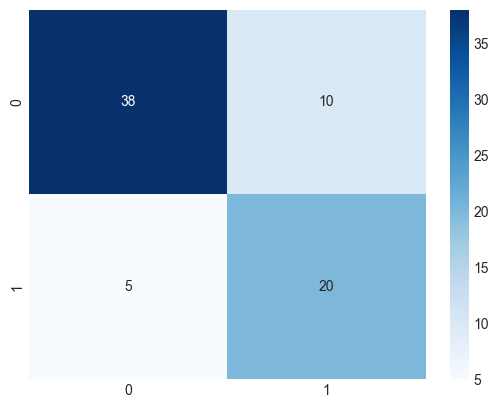

In [39]:
def evaluate_model(gscv, X_test, y_test):
    print('best parameter:')
    print(gscv.best_params_)

    print('\nbest cross validatiaon recall score:')
    print(gscv.best_score_)

    print('\nbest estimator:')
    model_lr = gscv.best_estimator_

    y_pred = model_lr.predict(X_test)
    print('\nclassification report:')
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    print('\nconfusion matrix:')
    sns.heatmap(cm, annot=True, cmap='Blues')
    plt.show()

evaluate_model(gscv, X_test, y_test)



#### 4.2 Random Forest

In [40]:
param_grid = {
    'n_estimators': [10, 50, 100, 200, 500],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20],
}

# model
model_rf = RandomForestClassifier()
# grid search
gscv = GridSearchCV(model_rf, param_grid=param_grid, scoring='f1', cv=10)
gscv.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20],
                         'n_estimators': [10, 50, 100, 200, 500]},
             scoring='f1')

best parameter:
{'criterion': 'gini', 'max_depth': 20, 'n_estimators': 50}

best cross validatiaon recall score:
0.643641132516937

best estimator:

classification report:
              precision    recall  f1-score   support

           0       0.79      0.88      0.83        48
           1       0.70      0.56      0.62        25

    accuracy                           0.77        73
   macro avg       0.75      0.72      0.73        73
weighted avg       0.76      0.77      0.76        73


confusion matrix:


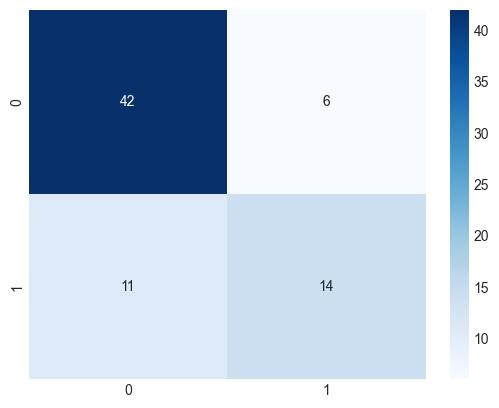

In [41]:
evaluate_model(gscv, X_test, y_test)

### 5 Modelling Tanpa Tuning

#### 5.1 Logistic Regression

In [42]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression()

In [43]:
def evaluate_model_no_tune(model, X_test, y_test):


    y_pred = model.predict(X_test)
    print('\nclassification report:')
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    print('\nconfusion matrix:')
    sns.heatmap(cm, annot=True, cmap='Blues')
    plt.show()


classification report:
              precision    recall  f1-score   support

           0       0.79      0.92      0.85        48
           1       0.76      0.52      0.62        25

    accuracy                           0.78        73
   macro avg       0.78      0.72      0.73        73
weighted avg       0.78      0.78      0.77        73


confusion matrix:


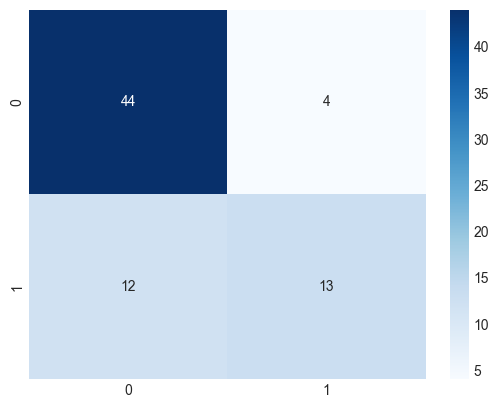

In [44]:
evaluate_model_no_tune(model_lr, X_test, y_test)

#### 5.2 Random Forest

In [45]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)


RandomForestClassifier()


classification report:
              precision    recall  f1-score   support

           0       0.77      0.85      0.81        48
           1       0.65      0.52      0.58        25

    accuracy                           0.74        73
   macro avg       0.71      0.69      0.69        73
weighted avg       0.73      0.74      0.73        73


confusion matrix:


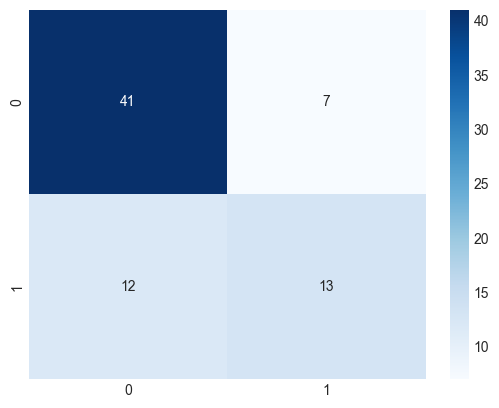

In [46]:
evaluate_model_no_tune(rf, X_test, y_test)

### 6. Hasil dan Kesimpulan

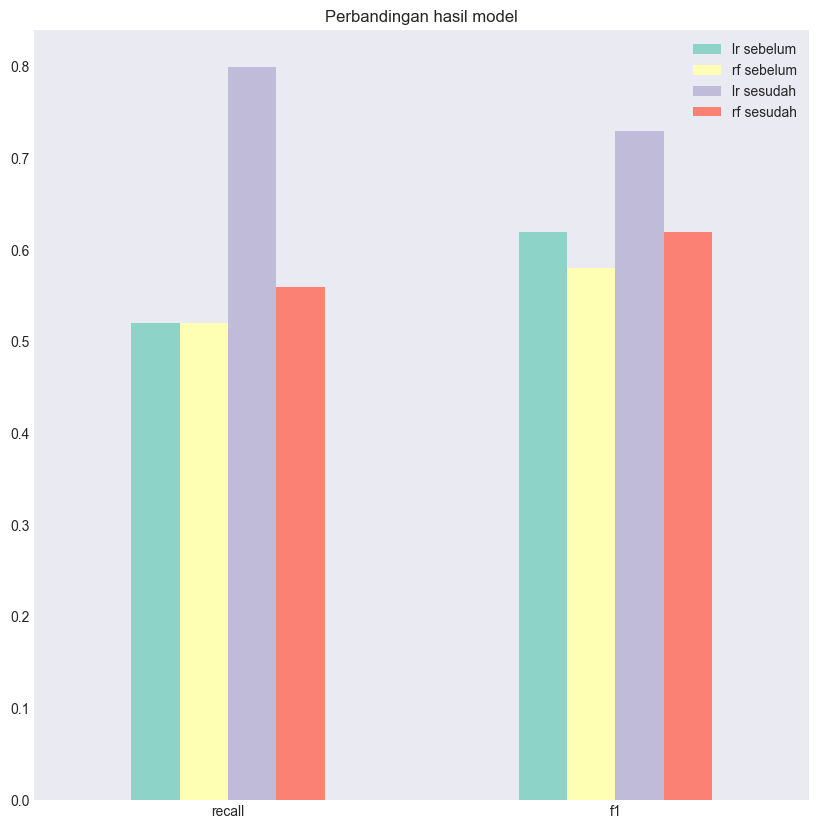

In [55]:
#note lr = LogisticRegression, rf = RandomForestClassifier, sebelum = sebelum tuning, sesudah = sesudah tuning

result={
    'lr sebelum':[0.52,0.62],
    'rf sebelum':[0.52,0.58],
    'lr sesudah':[0.80,0.73],
    'rf sesudah':[0.56,0.62]
}


result=pd.DataFrame(result,index=['recall','f1'])

result.plot(kind='bar',figsize=(10,10))
plt.title('Perbandingan hasil model')
plt.xticks(rotation=0)
plt.show()



dari hasil tersebut didapatkan bahwa model terbaik yang dihasilkan adalah logistic regression yang telah dituning dengan nilai recall sebesar 0.80 dan f1 score sebesar 0.73 dimana nilai recall dan f1 score tertinggi yang didapatkan pada penelitian sebelumnya [2](https://www.ijitee.org/wp-content/uploads/papers/v8i11/K21550981119.pdf) adalah 0.76 dan 0.75. Hal ini menunjukkan bahwa model yang dihasilkan telah mengalami peningkatan performansi pada recall namun penurunan pada f1 score. Selain itu juga didapat informasi bahwa hyperparameter tuning memiliki pengaruh untuk meningkatkan performansi model serta model random forest dinilai menghasilkan performansi yang lebih buruk dibandingkan dengan logistic regression.